<a href="https://colab.research.google.com/github/siderbrand/PROYECTO-KAGGLE/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

</center></font></h1>
<center>
INTRODUCCION A LA INTELIGENIA ARTIFICIAL

 </center></font></h1>
<h2><font color='0B5345'> <center>
PROYECTO KAGGLE</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

<p3><center><b><font> Juan Andres Toro Acevedo - Bioingenieria
<p3><center><b><font> Eliana María Brand Agudelo - Ingenieria en Sistemas
<p3><center><b><font> Claudia Rocha - Ingenieria en Sistemas

### **ANÁLSIS EXPLORATORIO DE DATOS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from tabulate import tabulate
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introduccion IA/train.csv', sep=',')
df

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


--- Top 5 Programas Académicos (E_PRGM_ACADEMICO	) ---
E_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
Name: count, dtype: int64


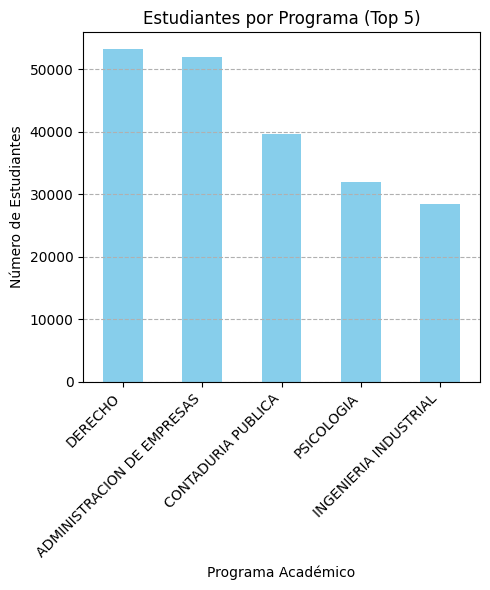

In [ ]:
conteo_programa = df['E_PRGM_ACADEMICO'].value_counts()

print("--- Top 5 Programas Académicos (E_PRGM_ACADEMICO	) ---")
print(conteo_programa.head(5))

plt.figure(figsize=(5, 6))
conteo_programa.head(5).plot(kind='bar', color='skyblue')
plt.title('Estudiantes por Programa (Top 5)')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Ver estructura y tipo de datos
df.info()

# Ver valores nulos
df.isnull().sum().sort_values(ascending=False)

# Ver porcentaje de nulos
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

,0
F_TIENEAUTOMOVIL,6.299350
F_TIENELAVADORA,5.743394
F_TIENECOMPUTADOR,5.502238
F_ESTRATOVIVIENDA,4.640722
E_HORASSEMANATRABAJA,4.455884
F_TIENEINTERNET.1,3.845343
F_TIENEINTERNET,3.845343
F_EDUCACIONMADRE,3.417184
F_EDUCACIONPADRE,3.347004
E_PAGOMATRICULAPROPIO,0.938339


In [ ]:
df.columns.tolist()



['ID',
 'PERIODO_ACADEMICO',
 'E_PRGM_ACADEMICO',
 'E_PRGM_DEPARTAMENTO',
 'E_VALORMATRICULAUNIVERSIDAD',
 'E_HORASSEMANATRABAJA',
 'F_ESTRATOVIVIENDA',
 'F_TIENEINTERNET',
 'F_EDUCACIONPADRE',
 'F_TIENELAVADORA',
 'F_TIENEAUTOMOVIL',
 'E_PRIVADO_LIBERTAD',
 'E_PAGOMATRICULAPROPIO',
 'F_TIENECOMPUTADOR',
 'F_TIENEINTERNET.1',
 'F_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'INDICADOR_1',
 'INDICADOR_2',
 'INDICADOR_3',
 'INDICADOR_4']

In [ ]:
cols_to_drop = ['ID', 'F_TIENEINTERNET.1']

df = df.drop(columns=cols_to_drop, errors='ignore')
df.columns.tolist()


['PERIODO_ACADEMICO',
 'E_PRGM_ACADEMICO',
 'E_PRGM_DEPARTAMENTO',
 'E_VALORMATRICULAUNIVERSIDAD',
 'E_HORASSEMANATRABAJA',
 'F_ESTRATOVIVIENDA',
 'F_TIENEINTERNET',
 'F_EDUCACIONPADRE',
 'F_TIENELAVADORA',
 'F_TIENEAUTOMOVIL',
 'E_PRIVADO_LIBERTAD',
 'E_PAGOMATRICULAPROPIO',
 'F_TIENECOMPUTADOR',
 'F_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'INDICADOR_1',
 'INDICADOR_2',
 'INDICADOR_3',
 'INDICADOR_4']

In [ ]:
# Quitar espacios y reemplazar puntos por guiones bajos
df.columns = df.columns.str.strip().str.replace('.', '_').str.upper()


In [ ]:
# Normalizar texto
df['F_EDUCACIONPADRE'] = df['F_EDUCACIONPADRE'].str.strip().str.lower()
df['F_EDUCACIONMADRE'] = df['F_EDUCACIONMADRE'].str.strip().str.lower()

# Reemplazar valores "no sabe" o inconsistentes
df['F_EDUCACIONPADRE'] = df['F_EDUCACIONPADRE'].replace('no sabe', np.nan)
df['F_EDUCACIONMADRE'] = df['F_EDUCACIONMADRE'].replace('no sabe', np.nan)

df['F_ESTRATOVIVIENDA'] = df['F_ESTRATOVIVIENDA'].astype(str)

# Extraer número del estrato
df['F_ESTRATOVIVIENDA'] = df['F_ESTRATOVIVIENDA'].str.extract(r'(\d)').astype(float)

# Codificar rendimiento global
map_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(map_rendimiento)


In [ ]:
# Imputar valores numéricos con la media
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Imputar categóricos con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Eliminar duplicados si los hay
df = df.drop_duplicates()


In [ ]:
print(df.isnull().sum().sum(), "valores nulos restantes")
print(df.shape, "dimensiones finales")
df.head()


0 valores nulos restantes
(692500, 19) dimensiones finales


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3.0,Si,técnica o tecnológica incompleta,Si,Si,N,No,Si,postgrado,2,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3.0,No,técnica o tecnológica completa,Si,No,N,No,Si,técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3.0,Si,secundaria (bachillerato) completa,Si,No,N,No,No,secundaria (bachillerato) completa,0,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4.0,Si,secundaria (bachillerato) completa,Si,No,N,No,Si,secundaria (bachillerato) completa,3,0.485,0.172,0.252,0.190
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3.0,Si,primaria completa,Si,Si,N,No,Si,primaria completa,1,0.316,0.232,0.285,0.294


In [ ]:
# CODIFICACION DE VARIABLES CATEGORICAS:
# 1. Convertir binarias
bin_map = {'Si': 1, 'No': 0, 'N': 0}
cols_bin = ['F_TIENEINTERNET', 'F_TIENELAVADORA', 'E_PRIVADO_LIBERTAD',
            'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEAUTOMOVIL']
for col in cols_bin:
    df[col] = df[col].map(bin_map)
df.head()


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3.0,1,técnica o tecnológica incompleta,1,1,0.0,0,1,postgrado,2,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3.0,0,técnica o tecnológica completa,1,0,0.0,0,1,técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3.0,1,secundaria (bachillerato) completa,1,0,0.0,0,0,secundaria (bachillerato) completa,0,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4.0,1,secundaria (bachillerato) completa,1,0,0.0,0,1,secundaria (bachillerato) completa,3,0.485,0.172,0.252,0.190
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3.0,1,primaria completa,1,1,0.0,0,1,primaria completa,1,0.316,0.232,0.285,0.294


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
#2. Codificacion de variables ordinales:
import unidecode  # quita tildes fácilmente

# Normalizar textos
df['E_VALORMATRICULAUNIVERSIDAD'] = df['E_VALORMATRICULAUNIVERSIDAD'].astype(str).apply(lambda x: unidecode.unidecode(x.strip().lower()))
df['E_HORASSEMANATRABAJA'] = df['E_HORASSEMANATRABAJA'].astype(str).apply(lambda x: unidecode.unidecode(x.strip().lower()))
df['F_EDUCACIONPADRE'] = df['F_EDUCACIONPADRE'].astype(str).apply(lambda x: unidecode.unidecode(x.strip().lower()))
df['F_EDUCACIONMADRE'] = df['F_EDUCACIONMADRE'].astype(str).apply(lambda x: unidecode.unidecode(x.strip().lower()))

# Diccionarios adaptados a texto normalizado
map_valor_matricula = {
    'entre 500 mil y menos de 1 millon': 1,
    'entre 1 millon y menos de 2.5 millones': 2,
    'entre 2.5 millones y menos de 4 millones': 3,
    'entre 4 millones y menos de 5.5 millones': 4,
    'entre 5.5 millones y menos de 7 millones': 5,
    'mas de 7 millones': 6
}

map_horas = {
    '0': 0,
    'menos de 10 horas': 1,
    'entre 11 y 20 horas': 2,
    'entre 21 y 30 horas': 3,
    'mas de 30 horas': 4
}

map_educacion = {
    'primaria incompleta': 1,
    'primaria completa': 2,
    'secundaria (bachillerato) incompleta': 3,
    'secundaria (bachillerato) completa': 4,
    'tecnica o tecnologica incompleta': 5,
    'tecnica o tecnologica completa': 6,
    'educacion profesional incompleta': 7,
    'educacion profesional completa': 8,
    'postgrado': 9,
    'no sabe': 0
}


# Aplicar los mapeos
df['E_VALORMATRICULAUNIVERSIDAD'] = df['E_VALORMATRICULAUNIVERSIDAD'].map(map_valor_matricula)
df['E_HORASSEMANATRABAJA'] = df['E_HORASSEMANATRABAJA'].map(map_horas)
df['F_EDUCACIONPADRE'] = df['F_EDUCACIONPADRE'].map(map_educacion)
df['F_EDUCACIONMADRE'] = df['F_EDUCACIONMADRE'].map(map_educacion)


print(df[['E_VALORMATRICULAUNIVERSIDAD','E_HORASSEMANATRABAJA','F_EDUCACIONPADRE','F_EDUCACIONMADRE']].isna().sum())


E_VALORMATRICULAUNIVERSIDAD    99791
E_HORASSEMANATRABAJA               0
F_EDUCACIONPADRE               31237
F_EDUCACIONMADRE               16401
dtype: int64


In [ ]:
cols_categoricas_ordinales = [
    'E_VALORMATRICULAUNIVERSIDAD',
    'E_HORASSEMANATRABAJA',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE'
]

# Reemplazar NaN por 0
df[cols_categoricas_ordinales] = df[cols_categoricas_ordinales].fillna(0)

print(df[cols_categoricas_ordinales].isna().sum())


E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_EDUCACIONPADRE               0
F_EDUCACIONMADRE               0
dtype: int64


In [ ]:
# 3. Label encoder para las que tienen muchas categorias:
le = LabelEncoder()
cols_label = ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']
for col in cols_label:
    df[col] = le.fit_transform(df[col].astype(str))
print(df.shape)
df.head()

(692500, 19)


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,300,4,5.0,1,3.0,1,5.0,1,1,0.0,0,1,9.0,2,0.322,0.208,0.310,0.267
1,20212,249,3,3.0,0,3.0,0,6.0,1,0,0.0,0,1,5.0,0,0.311,0.215,0.292,0.264
2,20203,819,4,3.0,4,3.0,1,4.0,1,0,0.0,0,0,4.0,0,0.297,0.214,0.305,0.264
3,20195,14,26,4.0,0,4.0,1,4.0,1,0,0.0,0,1,4.0,3,0.485,0.172,0.252,0.190
4,20212,907,1,3.0,3,3.0,1,2.0,1,1,0.0,0,1,2.0,1,0.316,0.232,0.285,0.294
